# NFT Price Analysis Data Challenge

> The objective of this notebook is to explore the dataset available in the challenge proposed by the Ocean Protocol in order to understand the sale of NFTs in different contexts.


> Creator: Néstor Campos (https://www.linkedin.com/in/nescampos/)


> Date: 2023-04-26


> Challenge: https://blog.oceanprotocol.com/nft-price-analysis-data-challenge-ded2d64f8d59


## Extracting and opening the dataset


> A copy of the dataset was downloaded to make it easy to read at all times. This exploration uses Google Colab and Drive, but can be applied in any context with local files.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
nft_collections = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OCEAN/Azuki_BAYC_MAYC_Otherdeed_Moonbirds.csv")

<ipython-input-4-080fccacae09>:1: DtypeWarning: Columns (14,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  nft_collections = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OCEAN/Azuki_BAYC_MAYC_Otherdeed_Moonbirds.csv")


## Selection of NFT collections

> For this challenge, the "MutantApeYachtClub" and "Otherdeed" collections have been selected



In [5]:
mutantapeyatchclub_collection = nft_collections[nft_collections.collection_name == "MutantApeYachtClub"]
otherdeed_collection = nft_collections[nft_collections.collection_name == "Otherdeed"]

# Evaluation

## 1. Analyze how the number of daily transactions for the collections has changed over time.

a. We transform the timestamp into a date (without time) in order to generate a line graph exploring the evolution of each NFT transaction in the collections.

In [6]:
mutantapeyatchclub_collection['timestamp_justdate'] = pd.to_datetime(mutantapeyatchclub_collection['timestamp']).dt.date
otherdeed_collection['timestamp_justdate'] = pd.to_datetime(otherdeed_collection['timestamp']).dt.date

<ipython-input-6-0160743ad67a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutantapeyatchclub_collection['timestamp_justdate'] = pd.to_datetime(mutantapeyatchclub_collection['timestamp']).dt.date
<ipython-input-6-0160743ad67a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherdeed_collection['timestamp_justdate'] = pd.to_datetime(otherdeed_collection['timestamp']).dt.date


b. We show and graph the daily transactions for "MutantApeYachtClub".

As can be seen in the graph, there was an initial peak in transactions, due to the appearance of this collection and the expectations generated, but with a strong decrease due to the bear market since 2021, with a small increase at the beginning of 2023 with the growth of cryptocurrencies and greater use of marketplaces.

<ipython-input-7-c0efdae90634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutantapeyatchclub_collection['transactions'] = 1


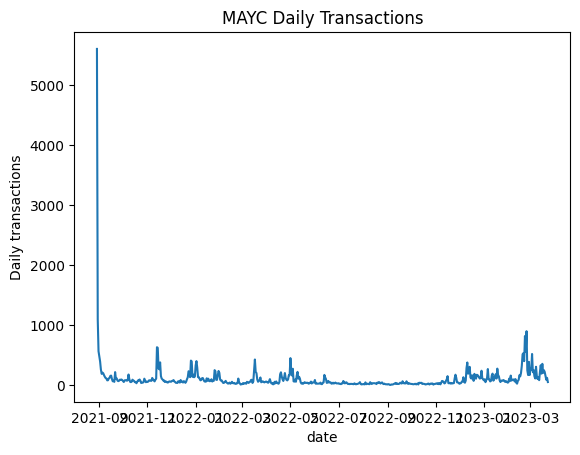

In [7]:
mutantapeyatchclub_collection['transactions'] = 1
transacciones_diarias_mayc = mutantapeyatchclub_collection.groupby('timestamp_justdate')['transactions'].sum()


# Graficar la serie temporal de transacciones diarias
transacciones_diarias_mayc.plot(kind='line')
plt.xlabel('date')
plt.ylabel('Daily transactions')
plt.title('MAYC Daily Transactions')
plt.show()

c. We show and graph the daily transactions for "Otherdeed".

As can be seen in the graph, there was an initial peak in transactions, due to the appearance of this collection and the expectations generated, but with a sharp decline immediately after its initial transactions and a slight increase in 2023.

<ipython-input-8-9aaac391fbc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherdeed_collection['transactions'] = 1


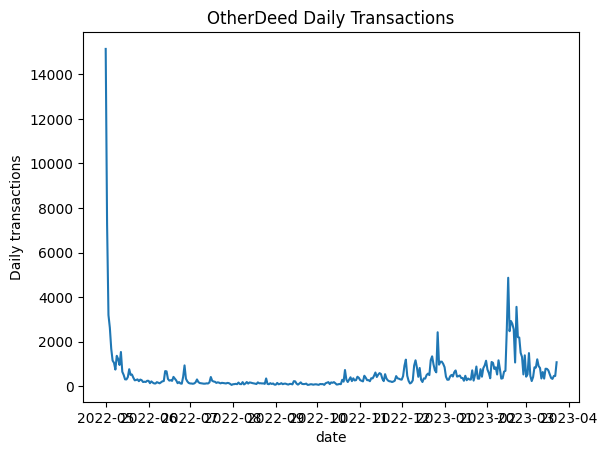

In [8]:
otherdeed_collection['transactions'] = 1
transacciones_diarias_od = otherdeed_collection.groupby('timestamp_justdate')['transactions'].sum()


# Graficar la serie temporal de transacciones diarias
transacciones_diarias_od.plot(kind='line')
plt.xlabel('date')
plt.ylabel('Daily transactions')
plt.title('OtherDeed Daily Transactions')
plt.show()

## 2. Provide a visual overview of the NFT collections of your choice and its characteristics (e.g. size, type of NFTs, date range)?

> For this exploration, I decided to use the most representative and understandable columns for both experts and non-experts in NFT, which are: exchange_name, aggregator_name and __indexer_id (collection indexer)



### By exchange_name

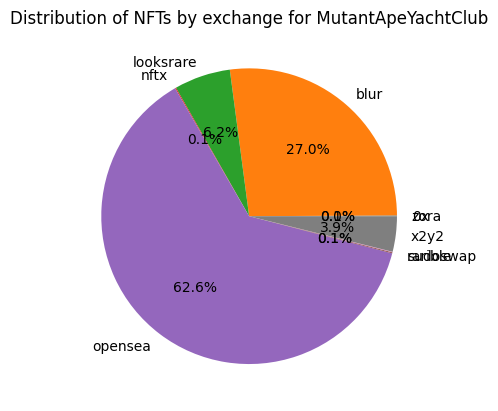

  exchange_name  counts
0            0x      46
1          blur   16355
2     looksrare    3726
3          nftx      66
4       opensea   37905
5       rarible      67
6      sudoswap      36
7          x2y2    2341
8          zora       2


In [9]:
mutantapeyatchclub_collection_exchangegrouped = mutantapeyatchclub_collection.groupby(['exchange_name']).size().reset_index(name='counts')
fig, ax = plt.subplots()
ax.pie(mutantapeyatchclub_collection_exchangegrouped['counts'], labels=mutantapeyatchclub_collection_exchangegrouped['exchange_name'], autopct='%1.1f%%')
ax.set_title('Distribution of NFTs by exchange for MutantApeYachtClub')
plt.show()
print(mutantapeyatchclub_collection_exchangegrouped)

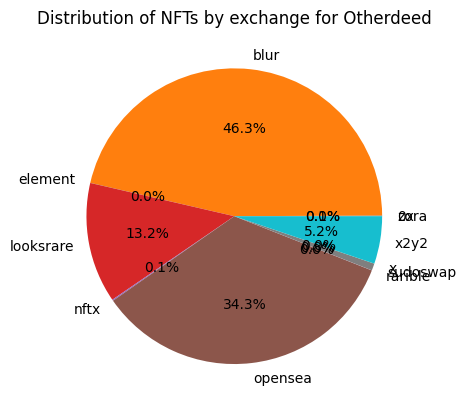

   exchange_name  counts
0             0x     127
1           blur   81355
2        element      18
3      looksrare   23139
4           nftx     226
5        opensea   60322
6        rarible      20
7       sudoswap    1345
8              x       8
9           x2y2    9129
10          zora       1


In [10]:
otherdeed_collection_exchangegrouped = otherdeed_collection.groupby(['exchange_name']).size().reset_index(name='counts')
fig, ax = plt.subplots()
ax.pie(otherdeed_collection_exchangegrouped['counts'], labels=otherdeed_collection_exchangegrouped['exchange_name'], autopct='%1.1f%%')
ax.set_title('Distribution of NFTs by exchange for Otherdeed')
plt.show()
print(otherdeed_collection_exchangegrouped)

### By aggregator_name

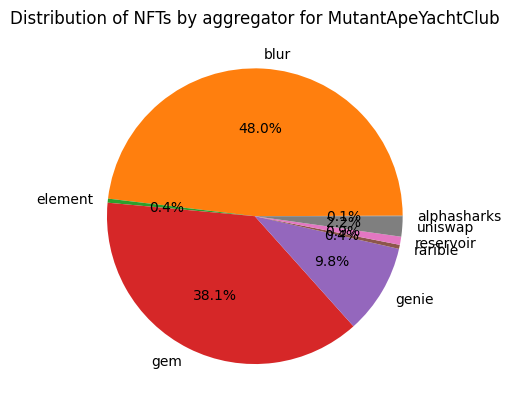

  aggregator_name  counts
0     alphasharks       1
1            blur     758
2         element       7
3             gem     601
4           genie     155
5         rarible       7
6       reservoir      14
7         uniswap      35


In [11]:
mutantapeyatchclub_collection_aggregatorgrouped = mutantapeyatchclub_collection.groupby(['aggregator_name']).size().reset_index(name='counts')
fig, ax = plt.subplots()
ax.pie(mutantapeyatchclub_collection_aggregatorgrouped['counts'], labels=mutantapeyatchclub_collection_aggregatorgrouped['aggregator_name'], autopct='%1.1f%%')
ax.set_title('Distribution of NFTs by aggregator for MutantApeYachtClub')
plt.show()
print(mutantapeyatchclub_collection_aggregatorgrouped)

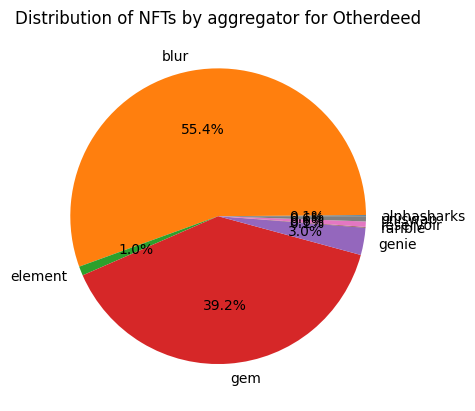

  aggregator_name  counts
0     alphasharks      21
1            blur   10311
2         element     188
3             gem    7296
4           genie     553
5         rarible      17
6       reservoir     110
7         uniswap     106


In [12]:
otherdeed_collection_aggregatorgrouped = otherdeed_collection.groupby(['aggregator_name']).size().reset_index(name='counts')
fig, ax = plt.subplots()
ax.pie(otherdeed_collection_aggregatorgrouped['counts'], labels=otherdeed_collection_aggregatorgrouped['aggregator_name'], autopct='%1.1f%%')
ax.set_title('Distribution of NFTs by aggregator for Otherdeed')
plt.show()
print(otherdeed_collection_aggregatorgrouped)

### By indexer_id

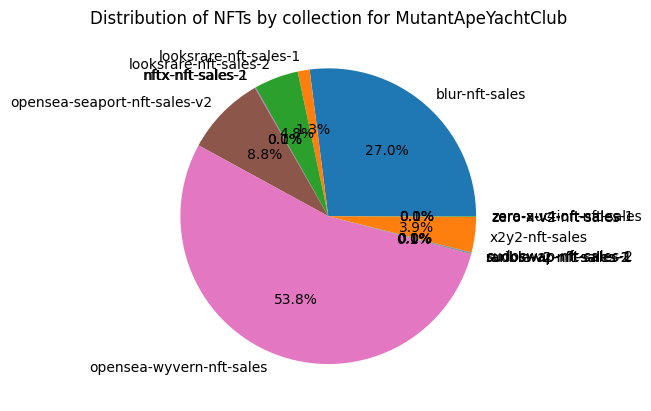

                    __indexer_id  counts
0                 blur-nft-sales   16355
1          looksrare-nft-sales-1     791
2          looksrare-nft-sales-2    2935
3               nftx-nft-sales-1      15
4               nftx-nft-sales-2      51
5   opensea-seaport-nft-sales-v2    5306
6       opensea-wyvern-nft-sales   32599
7         rarible-v2-nft-sales-1      64
8         rarible-v2-nft-sales-2       3
9           sudoswap-nft-sales-1       2
10          sudoswap-nft-sales-2      34
11                x2y2-nft-sales    2341
12           zero-x-v2-nft-sales      44
13         zero-x-v4-nft-sales-1       2
14        zora-auction-nft-sales       2


In [13]:
mutantapeyatchclub_collection_indexedgrouped = mutantapeyatchclub_collection.groupby(['__indexer_id']).size().reset_index(name='counts')
fig, ax = plt.subplots()
ax.pie(mutantapeyatchclub_collection_indexedgrouped['counts'], labels=mutantapeyatchclub_collection_indexedgrouped['__indexer_id'], autopct='%1.1f%%')
ax.set_title('Distribution of NFTs by collection for MutantApeYachtClub')
plt.show()
print(mutantapeyatchclub_collection_indexedgrouped)

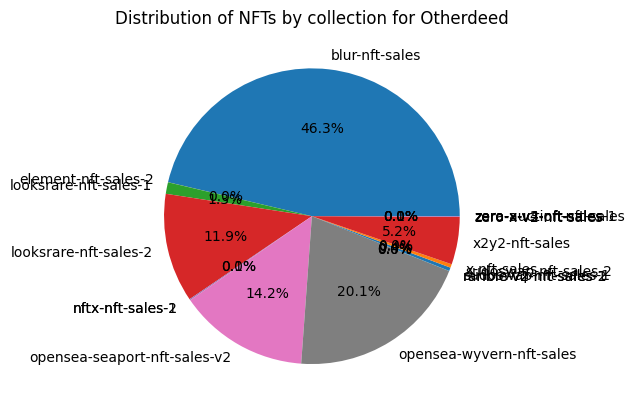

                    __indexer_id  counts
0                 blur-nft-sales   81355
1            element-nft-sales-2      18
2          looksrare-nft-sales-1    2217
3          looksrare-nft-sales-2   20922
4               nftx-nft-sales-1     186
5               nftx-nft-sales-2      40
6   opensea-seaport-nft-sales-v2   25000
7       opensea-wyvern-nft-sales   35322
8         rarible-v2-nft-sales-1      13
9         rarible-v2-nft-sales-2       7
10          sudoswap-nft-sales-1     673
11          sudoswap-nft-sales-2     672
12                   x-nft-sales       8
13                x2y2-nft-sales    9129
14           zero-x-v2-nft-sales     116
15           zero-x-v3-nft-sales       4
16         zero-x-v4-nft-sales-1       7
17        zora-auction-nft-sales       1


In [14]:
otherdeed_collection_indexedgrouped = otherdeed_collection.groupby(['__indexer_id']).size().reset_index(name='counts')
fig, ax = plt.subplots()
ax.pie(otherdeed_collection_indexedgrouped['counts'], labels=otherdeed_collection_indexedgrouped['__indexer_id'], autopct='%1.1f%%')
ax.set_title('Distribution of NFTs by collection for Otherdeed')
plt.show()
print(otherdeed_collection_indexedgrouped)

## 3. Determine the correlation between the number of transactions in a collection and its floor price

For this case, I did a manual analysis and understand each of the columns, but in itself there is not a strong correlation between the price and any attribute. This is due to several factors:

to. The expectation generated by the collections at the moment of appearing, generating very high prices for the demand, and then a substantial drop (but the data cannot explain that, since it would be biased to only use dates).
b. The issues with the bear market in 2021 and 2022 that reduced NFT movements.
c. The problems and scams in the crypto world in 2022, which discouraged many transactions for a while.

In [15]:
mutantapeyatchclub_collection_grouped = mutantapeyatchclub_collection.groupby('__indexer_id').agg({'usd_price': 'min', 'transactions': 'sum'})
mutantapeyatchclub_collection_grouped = mutantapeyatchclub_collection_grouped.rename(columns={'usd_price': 'min_usd_price', 'transactions': 'total_transactions'})
correlation = mutantapeyatchclub_collection_grouped['total_transactions'].corr(mutantapeyatchclub_collection_grouped['min_usd_price'])
print("Correlation for mutantapeyatchclub (-1 without correlation, and 1 with much correlation): "+str(correlation))

Correlation for mutantapeyatchclub (-1 without correlation, and 1 with much correlation): -0.3241059271106382


In [16]:
otherdeed_collection_grouped = otherdeed_collection.groupby('__indexer_id').agg({'usd_price': 'min', 'transactions': 'sum'})
otherdeed_collection_grouped = otherdeed_collection_grouped.rename(columns={'usd_price': 'min_usd_price', 'transactions': 'total_transactions'})
correlation = otherdeed_collection_grouped['total_transactions'].corr(otherdeed_collection_grouped['min_usd_price'])
print("Correlation for otherdeed (-1 without correlation, and 1 with much correlation): "+str(correlation))

Correlation for otherdeed (-1 without correlation, and 1 with much correlation): -0.364446383761314


## 4. Determine the correlation between the number of transactions in a collection and the price of ETH

This case is similar to the third question, but here I am using the ETH price column.

In [17]:
mutantapeyatchclub_collection_grouped = mutantapeyatchclub_collection.groupby('__indexer_id').agg({'eth_price': 'min', 'transactions': 'sum'})
mutantapeyatchclub_collection_grouped = mutantapeyatchclub_collection_grouped.rename(columns={'eth_price': 'min_eth_price', 'transactions': 'total_transactions'})
correlation = mutantapeyatchclub_collection_grouped['total_transactions'].corr(mutantapeyatchclub_collection_grouped['min_eth_price'])
print("Correlation for mutantapeyatchclub (-1 without correlation, and 1 with much correlation): "+str(correlation))

Correlation for mutantapeyatchclub (-1 without correlation, and 1 with much correlation): -0.29847069648971963


In [18]:
otherdeed_collection_grouped = otherdeed_collection.groupby('__indexer_id').agg({'eth_price': 'min', 'transactions': 'sum'})
otherdeed_collection_grouped = otherdeed_collection_grouped.rename(columns={'eth_price': 'min_eth_price', 'transactions': 'total_transactions'})
correlation = otherdeed_collection_grouped['total_transactions'].corr(otherdeed_collection_grouped['min_eth_price'])
print("Correlation for otherdeed (-1 without correlation, and 1 with much correlation): "+str(correlation))

Correlation for otherdeed (-1 without correlation, and 1 with much correlation): -0.38757877204817787


## 5. What are the most liquid traits (those with the most sales) for each collection?

A simple analysis was made to obtain for each indexer, the NFT (by ID) that had the most sales. That was valued instead of the amount of the sale, because an NFT that "moves" a lot in different transactions looks more valuable than an NFT with only one very high sale, but which is no longer liquid.

### mutantapeyatchclub

In [19]:
nft_most_sales = mutantapeyatchclub_collection.groupby(['__indexer_id', 'token_id']).agg({'eth_price': 'max', 'transactions': 'sum'})

nft_most_sales = nft_most_sales.reset_index()

for collection in nft_most_sales['__indexer_id'].unique():
    nft_most_sales_collection = nft_most_sales[nft_most_sales['__indexer_id'] == collection]
    most_sales = nft_most_sales_collection['transactions'].max()
    best_seller = nft_most_sales_collection[nft_most_sales_collection['transactions'] == most_sales]['token_id'].values[0]
    print(f"NFT with most sales in {collection} collection is: {best_seller} with {most_sales} sales")

NFT with most sales in blur-nft-sales collection is: 2994 with 73 sales
NFT with most sales in looksrare-nft-sales-1 collection is: 7397 with 6 sales
NFT with most sales in looksrare-nft-sales-2 collection is: 2738 with 11 sales
NFT with most sales in nftx-nft-sales-1 collection is: 833 with 1 sales
NFT with most sales in nftx-nft-sales-2 collection is: 13608 with 3 sales
NFT with most sales in opensea-seaport-nft-sales-v2 collection is: 1294 with 10 sales
NFT with most sales in opensea-wyvern-nft-sales collection is: 5026 with 16 sales
NFT with most sales in rarible-v2-nft-sales-1 collection is: 3059 with 5 sales
NFT with most sales in rarible-v2-nft-sales-2 collection is: 5120 with 1 sales
NFT with most sales in sudoswap-nft-sales-1 collection is: 13914 with 1 sales
NFT with most sales in sudoswap-nft-sales-2 collection is: 17516 with 3 sales
NFT with most sales in x2y2-nft-sales collection is: 1911 with 9 sales
NFT with most sales in zero-x-v2-nft-sales collection is: 4526 with 3 sa

### Otherdeed

In [20]:
nft_most_sales = otherdeed_collection.groupby(['__indexer_id', 'token_id']).agg({'eth_price': 'max', 'transactions': 'sum'})

nft_most_sales = nft_most_sales.reset_index()

for collection in nft_most_sales['__indexer_id'].unique():
    nft_most_sales_collection = nft_most_sales[nft_most_sales['__indexer_id'] == collection]
    most_sales = nft_most_sales_collection['transactions'].max()
    best_seller = nft_most_sales_collection[nft_most_sales_collection['transactions'] == most_sales]['token_id'].values[0]
    print(f"NFT with most sales in {collection} collection is: {best_seller} with {most_sales} sales")

NFT with most sales in blur-nft-sales collection is: 95769 with 95 sales
NFT with most sales in element-nft-sales-2 collection is: 51452 with 2 sales
NFT with most sales in looksrare-nft-sales-1 collection is: 87679 with 6 sales
NFT with most sales in looksrare-nft-sales-2 collection is: 30894 with 24 sales
NFT with most sales in nftx-nft-sales-1 collection is: 55593 with 2 sales
NFT with most sales in nftx-nft-sales-2 collection is: 25273 with 1 sales
NFT with most sales in opensea-seaport-nft-sales-v2 collection is: 52759 with 11 sales
NFT with most sales in opensea-wyvern-nft-sales collection is: 55343 with 18 sales
NFT with most sales in rarible-v2-nft-sales-1 collection is: 68043 with 2 sales
NFT with most sales in rarible-v2-nft-sales-2 collection is: 14507 with 1 sales
NFT with most sales in sudoswap-nft-sales-1 collection is: 45916 with 3 sales
NFT with most sales in sudoswap-nft-sales-2 collection is: 50505 with 4 sales
NFT with most sales in x-nft-sales collection is: 10057 w